###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Statistical Learning I
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

## Laboratorio 3

#### Importar librerias

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Cargar Dataset

In [79]:
data=pd.read_csv('train.csv')

#### Explorar Dataset

In [80]:
## Forma del dataset
data.shape

(14447, 11)

In [81]:
## Columnas del dataset
data.columns

Index(['id', 'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [82]:
## Tipos de datos
data.dtypes

id                      int64
longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

### Ingenieria de Caracteristicas

#### 1. Columnas con Nulos

In [83]:
cols_NA=[] ## Variable vacia, que se llenara con los nulos
for col in data.columns:
    if data[col].isnull().any()==1: ## Si la columna del dataset es 1 (True) es que tiene Nulos
        cols_NA.append(col) ##Se agrega a la variable la columna que cumple tener Nulos
print(f"El dataset tiene: {len(cols_NA)} columnas con Nulos y son  {cols_NA}")


El dataset tiene: 1 columnas con Nulos y son  ['total_bedrooms']


#### 2. Proporción de Nulos para cada columna con faltantes

In [84]:
## Media de los Nulos
media_nulos=data[cols_NA].isnull().mean()
media_nulos

total_bedrooms    0.009483
dtype: float64

<BarContainer object of 1 artists>

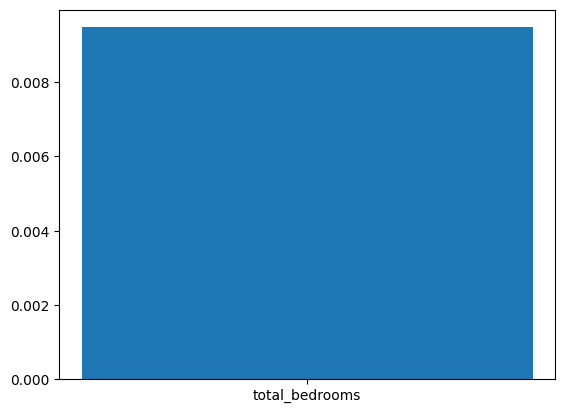

In [85]:
## Grafica
plt.bar(cols_NA,media_nulos)


#### 3. Imputación de datos numericos

##### a. Eliminar faltantes

In [86]:
## Eliminar del dataset los NaN
data_no_Nan=data.dropna()
data_no_Nan

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
14442,557,-122.25,37.77,43,4329,1110.0,2086,1053,2.9750,243400.0,NEAR BAY
14443,16090,-122.48,37.71,43,3850,1018.0,1497,829,3.5296,400000.0,NEAR OCEAN
14444,9083,-118.17,34.69,12,4881,803.0,2188,724,4.1667,171900.0,INLAND
14445,13138,-121.44,38.47,5,5666,1178.0,3139,1131,3.3608,108900.0,INLAND


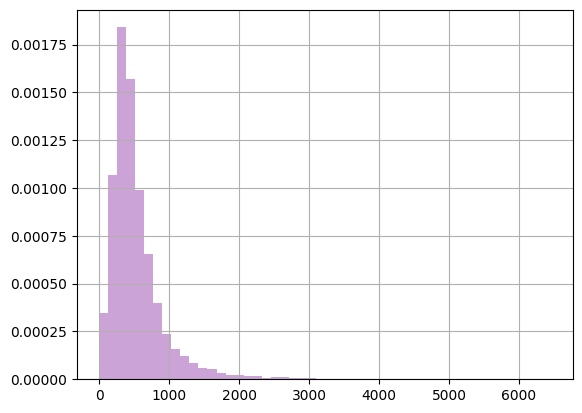

In [96]:
## Grafica para comparar la distorcion de la data original contra la data sin NAN
data['total_bedrooms'].hist(bins=50,density=True,color='red',alpha=0.2)
data_no_Nan['total_bedrooms'].hist(bins=50,density=True,color='blue',alpha=0.2)
plt.show()

##### b. Media y Mediana 

In [87]:
## Obtener la Media y Mediana

media=data['total_bedrooms'].mean()
mediana=data['total_bedrooms'].median()
print("Media: ",media)
print("Mediana: ",mediana)

Media:  537.7787561146051
Mediana:  433.0


In [88]:
## Crear variables con la media y mediana en lugar de los NaN
data['media_total_bedrooms']=np.round(data['total_bedrooms'].fillna(media),0)
data['mediana_total_bedrooms']=np.round(data['total_bedrooms'].fillna(mediana),0)
data[['total_bedrooms','media_total_bedrooms','mediana_total_bedrooms']][data.total_bedrooms.isnull()]

,total_bedrooms,media_total_bedrooms,mediana_total_bedrooms
18,NaN,538.0,433.0
379,NaN,538.0,433.0
605,NaN,538.0,433.0
743,NaN,538.0,433.0
923,NaN,538.0,433.0
...,...,...,...
14162,NaN,538.0,433.0
14235,NaN,538.0,433.0
14273,NaN,538.0,433.0
14275,NaN,538.0,433.0


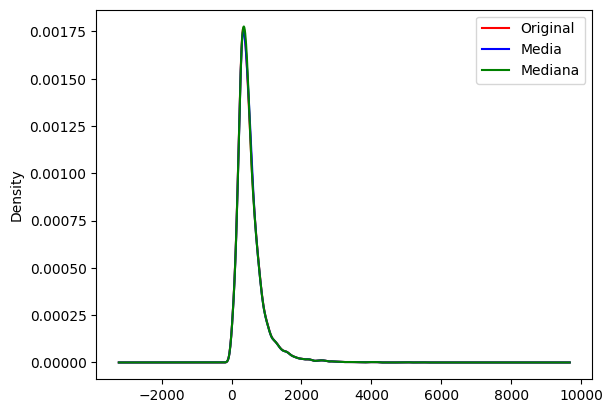

In [101]:
##Graficas para observar la distorcion entre la variable original, la imputación de media y la imputación de mediana
fig=plt.figure()
ax=fig.add_subplot(111)

data['total_bedrooms'].plot.density(color='red',label='Original')
data['media_total_bedrooms'].plot.density(color='blue',label='Media')
data['mediana_total_bedrooms'].plot.density(color='green',label='Mediana')
ax.legend()
plt.show()

In [106]:
##Se elige la media para imputar los nulos y se convierte la columna original en la columna nueva sin nulos

data['total_bedrooms']=data['media_total_bedrooms']

##Eliminar las columnas creadas de media y mediana, que sirvieron solo para analizar, para volver al dataset original pero con la columna imputada

data.drop(['media_total_bedrooms','mediana_total_bedrooms'],axis=1,inplace=True)

#### 4. Imputación de datos categoricos

In [ ]:
## No hay datos categoricos que imputar, unicamente una variable numerica

#### 5. Codificación de variables categóricas

In [111]:
## La unica variable categorica es ocean_proximity
data['ocean_proximity'].value_counts()

<1H OCEAN     6384
INLAND        4577
NEAR OCEAN    1865
NEAR BAY      1619
ISLAND           2
Name: ocean_proximity, dtype: int64

In [114]:
''' Por tener mas de 3 categorias No se elige One Hote Encoding.
    Se elige Codificación por Frecuencia '''

## Crear el diccionario con las frecuencias de la variable categorica 

ocean_proximity_freq_mapper=(data['ocean_proximity'].value_counts().sort_values(ascending=False)).to_dict()
print(ocean_proximity_freq_mapper)


## Hacer el mapeo de las frecuencias con las variables

data['ocean_proximity_code']=data['ocean_proximity'].map(ocean_proximity_freq_mapper)


{'<1H OCEAN': 6384, 'INLAND': 4577, 'NEAR OCEAN': 1865, 'NEAR BAY': 1619, 'ISLAND': 2}


In [115]:
data

,id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_code
0,9744,-121.65,36.77,15,2191,358.0,1150,330,4.7969,227500.0,<1H OCEAN,6384
1,13893,-116.27,34.13,37,452,109.0,184,59,3.7292,65800.0,INLAND,4577
2,18277,-122.07,37.34,35,1172,184.0,512,175,7.3561,500001.0,<1H OCEAN,6384
3,16176,-122.39,37.74,52,126,24.0,37,27,10.2264,225000.0,NEAR BAY,1619
4,8843,-118.38,34.09,28,4001,1352.0,1799,1220,2.5784,272900.0,<1H OCEAN,6384
...,...,...,...,...,...,...,...,...,...,...,...,...
14442,557,-122.25,37.77,43,4329,1110.0,2086,1053,2.9750,243400.0,NEAR BAY,1619
14443,16090,-122.48,37.71,43,3850,1018.0,1497,829,3.5296,400000.0,NEAR OCEAN,1865
14444,9083,-118.17,34.69,12,4881,803.0,2188,724,4.1667,171900.0,INLAND,4577
14445,13138,-121.44,38.47,5,5666,1178.0,3139,1131,3.3608,108900.0,INLAND,4577


In [125]:
## Dejar unicamente variables numericas
data.drop(['ocean_proximity'],axis=1,inplace=True)
data.dtypes

id                        int64
longitude               float64
latitude                float64
housing_median_age        int64
total_rooms               int64
total_bedrooms          float64
population                int64
households                int64
median_income           float64
median_house_value      float64
ocean_proximity_code      int64
dtype: object

#### 6. Feature Scaling